# PSTAT 234 Final Project - Portfolio Optimization

*Group: Xining Li, Ben Ku, Mi Yu, Zhipu Zhou*


## Summary

Welcome to the PSTAT 234 final project report of our group. The topic of this report is portfolio optimization. 

Portfolio optimization has wide application in financial industry. To make investment in a group of assets, investors need to construct a portfolio that determines how much money we should allocate to each asset. Generally, investors are risk-inverse -- they pursue high portfolio return while avoid uncertainty of return (i.e. risk). This leads to the primary objective of portfolio optimization: how to maximize the portfolio return at a given level of risk, or how to minimize portfolio risk at a given level of portfolio return. In Markovitz mean-variance portfolio model [1], risk is measured by the standard deviation of portfolio returns, and the optimal portfolio allocation is totally determined by the true return of each asset and the covariance matrix of the returns of the group of assets. However, in practice, the true returns and covariance matrix are not observable, they can only be estimated from asset historical data.
 
There are many ways to estimate the covariance matrix of returns of a group of assets. In this report, we will compare 3 estimation methods for the true covariance matrix or its inverse. As a result, we need to consider the minimal variance portfolio (MVP) model [2], instead of the mean-variance portfolio model. The former pursues to minimize portfolio risk regardless of the portfolio return and only requires to estimate the covariance matrix. It provides a better setting to compare the effectiveness of different (inverse) covariance matrix estimations. One problem of using historical data to estimate (inverse) covariance matrix is that because the financial market is not stationary, it needs to re-computed periodically (called rebalancing). This report will compare different rebalancing frequencies for each estimation method.


## Project objectives

The objectives of this report include:

- Introduction to MVP model with rebalancing 
- 3 (inverse) covariance matrix estimations: sample covariance estimation, Ledoit-Wolf estimation [3], graphical lasso estimation [4].
- Conduct empirical study to compare of portfolio performance.

## Introduction to MVP model with rebalancing

Suppose that we invest among $p$ assets. Let $r_{ti}$ is the daily return of $i$-th asset at time $t$, and $r_t = (r_{t1}, r_{t2}, \cdots, r_{tp})^T$ be the daily return vector of all assets at time $t$. Assume that the true covariance matrix of asset returns is $\Sigma$, then the optimal portfolio allocation is given by 
\begin{equation}
\text{minimize}_{w\in\mathbb{R}^p}\quad w^T\Sigma w\quad\text{subject to}\quad \mathbf{1}^Tw = 1
\end{equation}
where $\mathbf{1} = ({1,1,\cdots, 1})^T$. $\Sigma$ is unobservable and we need to estimate it using $\hat{\Sigma}$ from market historical data. However, because returns are not stationary over time, the estimated covariance of returns must be periodically updated. A general way is to periodically re-calculate $\hat{\Sigma}$ and rebalance the portfolio. Suppose that portfolio rebalancing period is $L$, meaning that every $L$ days the portfolio will be rebalanced once. Let $T_0$ be the investment starting time, and $T_E$ be the end time. The number of rebalancing times 
\begin{equation}
\mathcal{T} = 
\begin{cases}
&\lfloor\frac{T_E - T_0}{L}\rfloor,\quad&\text{if $\frac{T_E - T_0}{L}$ is not an integer}\\
&\frac{T_E - T_0}{L}-1,\quad&\text{if $\frac{T_E - T_0}{L}$ is an integer}
\end{cases}
\end{equation}
The rebalancing time points are assumed to be $T_1, T_2, \cdots, T_k, \cdots, T_{\mathcal{T}}$ with $T_k - T_{k-1} = L$ for $k=1, 2, \cdots, \mathcal{T}$. Suppose that the estimated covariance matrix for $k$-th rebalancing period is $\hat{\Sigma}_k$. Under MVP model, the portfolio allocation $w_k = (w_{k1}, w_{k2}, \cdots, w_{kp})$ during $k$-th period is

\begin{equation}
w_k = \text{argmin}_{w\in\mathbb{R}^p}\quad w^T\hat{\Sigma}_kw\quad\text{subject to}\quad \mathbf{1}^Tw = 1
\end{equation}

The solution to this model is

\begin{equation}
w_k = (\mathbf{1}^T\hat{\Sigma}_k^{-1}\mathbf{1})^{-1}\hat{\Sigma}_k^{-1}\mathbf{1}
\end{equation}

## Model parameter estimations

- **Sample covariance matrix estimator**: A standard way to estimate covariance matrix is sample covariance matrix. For $k$-th period, the sample covariance matrix estimation is
\begin{equation}
S = \frac{1}{L-1}\sum_{t=T_{k-1}+1-L}^{T_{k-1}}(r_t-\bar{r}_{k-1})(r_t-\bar{r}_{k-1})^T
\quad\text{where}\quad
\bar{r}_{k-1} = \biggl(\frac{1}{L}\sum_{t = T_{k-1}+1-L}^{T_{k-1}}r_{t1}, \cdots, \frac{1}{L}\sum_{t = T_{k-1}+1-L}^{T_{k-1}}r_{tp}\biggr)
\end{equation}

- **Ledoit-Wolf shrinkage estimator**: The problem of using sample covariance matrix estimation is that in high dimensional case where $L\leq p$, $S$ is singular and not invertible. Also, it has been shown [5] that sample covariance matrix contains large estimation error that could distort the portfolio optimization.  Many regularization methods have been proposed to estimate (inverse) covariance matrix. For example, the Ledoit-Wolf shrinkage estimator
\begin{equation}
\lambda S + (1-\lambda)I
\end{equation}
where $S$ is the sample covariance matrix, $\lambda\in[0,1]$ is a tuning parameter, and $I$ is the identity matrix. 

- **Graphical lasso estimator**: Although Ledoit-Wolf estimator helps to shrink extreme covariances to zero, its result is dense and fails to give a sparse matrix. Thi impose difficulty to interpret the dependences among asset returns. To solve this difficulty, [4] focuses on estimating inverse covariance matrix (also called precision matrix and is denoted as $\Omega = \Sigma^{-1}$) and proposes graphical lasso estimator:
\begin{equation}
\text{argmin}_{\Omega\in\mathbb{R}^{p\times p}}-\log\text{det}\Omega + \text{tr}(S\Omega) + \lambda\|\Omega\|_1
\end{equation}
where $\|\cdot\|_1$ is $l_1$ norm, $\text{det}\Omega$ is the determinant of $\Omega$, $\text{tr}(S\Omega)$ is the trace of $S\Omega$, $S$ is sample covariance matrix, and $\lambda$ is a tuning parameter. 

## Tuning parameter determination

## Portfolio performance measurements

Denote $k_t = k(t) = \{t: t\in[T_{k-1}+1, T_k]\}$, and we assume that there are 252 trading days per year. Following quantities are generally used to measure the performance of a portfolio [2]:

- **Realized return**: the annualized average return of the portfolio over the entire investment horizon $[T_0, T_E]$:

\begin{equation}
r_p = \frac{252}{T_E - T_0}\sum_{t=T_0+1}^{T_E}r_t^Tw_{k_t}
\end{equation}

- **Realized risk**: the standard deviation of portfolio over the entire investment horizon:

\begin{equation}
\sigma_p = \sqrt{\frac{252}{T_E-T_0}\sum_{t=T_0+1}^{T_E}(r_t^Tw_{k_t} - r_p)^2}
\end{equation}

- **Sharpe ratio**: the realized excess return of portfolio over the annualized risk-free interest rate $r_f$ per unit realized risk.

\begin{equation}
SR = \frac{r_p - r_f}{\sigma_p}
\end{equation}

- **Turnover**: the amount of new portfolio assets purchased or sold over $k$-th period:
\begin{equation}
TO(k) = \biggl\|w_k - w_{k-1}\cdot\bigodot_{t=T_{k-1}+1}^{T_k}(1+r_t)\biggr\|_1
\end{equation}
where 
\begin{equation}
\bigodot_{t=T_{k-1}+1}^{T_k}(1+r_t) = (1+r_{T_{k-1}+1})\cdot(1+r_{T_{k-1}+2})\cdot\cdots\cdot(1+r_{T_k})
\end{equation}
and $\cdot$ is dot product, $w_0 = (0,0,\cdots, 0)$. The average turnover over the entire investment horizon is:
\begin{equation}
\overline{TO} = \frac{1}{\mathcal{T}}\sum_{k=1}^{\mathcal{T}}TO(k)
\end{equation}

- **Size of short side**: the proportion of negative weights to the sum of absolute weights of portfolio allocation at $k$-th period:
\begin{equation}
SS(k) = \frac{\sum_{i=1}^p|\min(w_{ki},0)|}{\sum_{i=1}^p|w_{ki}|}
\end{equation}
and the average short side over the investment horizon is
\begin{equation}
\overline{SS} = \frac{1}{\mathcal{T}}\sum_{k=1}^{\mathcal{T}}SS(k)
\end{equation}

- **Normalized wealth**: accumulated wealth of portfolio with initial budget is 1 dollar. Transaction costs and borrowing costs are taken into consideration. Let $r_c$ be the transaction cost rate and $r_b$ be the daily borrowing cost rate of interest, the transaction cost incurred in the beginning of $k$-th period is 
\begin{equation}
TC(k) = r_c\times TO(k)
\end{equation}
and the borrowing cost incurred in $k$-th period is 
\begin{equation}
BC(k) = ((1+r_b)^L-1)\sum_{i=1}^p|\min(w_{k-1,i},0)|
\end{equation}
Let $W_{t-1}$ represent the wealth of portfolio after time $t-1$, then wealth of portfolio after time $t$ is
\begin{equation}
W_t =
\begin{cases}
&W_{t-1}(1+r_t^Tw_{k_t} - TC(k_t) - BC(k_t)), &t = T_{k_t-1}+1\\
&W_{t-1}(1+r_t^Tw_{k_t}), & t\neq T_{k_t-1}+1
\end{cases}
\end{equation}

## Empirical results

First, we load all modules we will use:

In [1]:
from collections import OrderedDict
import pandas as pd
import numpy as np
import math
import cvxpy as cvx
from sklearn.model_selection import KFold # import KFold to do cross validation
from sklearn.covariance import GraphLasso, GraphLassoCV, graph_lasso
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import linalg
from sklearn.preprocessing import scale
import glob
import os

We choose the Dow Jones Industrial Average component stocks as the group of assets in our portfolio. We downloaded the historical closing prices and use the following code to store the data in `closing_price_5yr.pkl`. Since this file is already available, we do not need to run the below code again.

In [2]:
# # get data file names
# path = os.getcwd()
# filenames = glob.glob(path + "/rawdata/*_data.csv")

# dfs = []
# for filename in filenames:
#     dfs.append(pd.read_csv(filename))

# # Concatenate all data into one DataFrame
# closing_price_5yr = pd.concat(dfs, ignore_index=True)[['Name','date','close']].pivot(index='date', columns='Name', values='close')
# closing_price_5yr.to_pickle("./closing_price_5yr.pkl")

Next, we define a class containing all the necessary functions for portfolio optimization.

In [3]:
# by applying Ledoit_wolf_cv the n_fold and shrinkage_num must be specified
import warnings
warnings.filterwarnings("ignore")

# by applying Ledoit_wolf_cv the n_fold and shrinkage_num must be specified
class portfolio_optimization():
    """This is a portfolio optimization class aiming to the Realized Return, 
    shortsize, turnover, and ending portfolio value. 
    
    Input, stock data address, selected companies name, days of period
    Using lediot_wolf, must specify n_fold and shrinkage_num
    Using graphical_lasso, must specify n_fold and alpha_num
    
    """
    def __init__(self, 
                 stock_dat_address, 
                 selected_companies_names ,
                 days_of_period,
                 start, 
                 covariance_method,
                 **method_parameters):
        self.selected_companies_names = selected_companies_names
        
        tmp_stock_data = pd.read_pickle(stock_dat_address).dropna(axis = 1)[selected_companies_names]
        self.stock_data = tmp_stock_data.iloc[252-days_of_period:]
        self.days_of_period =days_of_period
        self.covariance_method = covariance_method
        self.start = start
        
        if covariance_method!='sample':
            
            for key, value in method_parameters.items():
                setattr(self, key, value)

        ## The optimal_solution not considering the period
     
        self.Mat_Optimization_At_Each_Period = self.Optimization_At_Each_Period()  
  

    ##This is a Lediot_wolf method's function used to do cross-validation 
    # and compare the predictive risk
    ##There might be a problem, but I cannot find it because the difference
    ##in the predictive risk seems to be pretty random. We might not use this to do
    ##cross-validation

    #input the data, the number of folds, and the number of shrinkages value we want to test
    def Ledoit_wolf_cv(self, data,n_fold = 5, alpha_num = 50):
        datac = pd.DataFrame(scale(data, axis = 0, with_mean = True, with_std = True, copy = True))
        #The space between each fold
        shrinkage = np.arange(0,1,1.0/alpha_num)
        #create a dictionary with lambda as keys and their predictive risk as values
        #set the initial predictive risk to be 1
        # shrinkage_dict = dict((el,0) for el in shrinkage)
        sdv = data.std(axis = 0)
    
        default_fold ={'fold1':np.zeros(len(shrinkage))}
        for ticker in range(n_fold):
            default_fold.update({str('fold'+str(ticker+1)): np.zeros(len(shrinkage))})
        pr_all  =pd.DataFrame(default_fold)
        pr_all.index = shrinkage
        #loop through all the possible shrinkage values
        for l in shrinkage:
            #split into n-fold
            kf = KFold(n_splits = n_fold)
            ii = -1
            for train, test in kf.split(datac):
                ii = ii + 1
                 #get the training set
                X_train = datac.loc[train]
                #calculate the sample covariance matrix
                sample = np.cov(X_train,rowvar = False)
                ##next get the Ledoit-Wolf covariance matrix using the shriankgage 
                lw = np.multiply(sample,l) + np.multiply((1.0-l),np.identity(30))
                ##calculate the omega matrix
                omega = np.linalg.inv(lw)
                ##calculate the predictive risk
                ##Also first centralize the test data
                X_test = datac.loc[test]
                omega_diag_inv = np.diag(1/np.diag(omega)) #np.linalg.inv(omega_diag)
                #This calculates the quantity inside the norm
                m = np.matmul(X_test,np.matmul(omega,omega_diag_inv)) 
                #calculate the predictive risk
                pr_all.loc[l][ii] = (np.linalg.norm(m,2))**2/len(test)
                #This gives the best shrinkage value after the cross-validation
        best_shrinkage = np.argmin(pr_all.mean(axis = 1)) 
        actual_sample = np.cov(datac,rowvar = False)
        lw = np.multiply(actual_sample,best_shrinkage) + np.multiply((1.0-best_shrinkage),np.identity(30))
        ##Using the best shrinkage to get the Ledoit-Wolf covariance matrix
        final_lw = np.matmul(np.matmul(np.diag(sdv), lw), np.diag(sdv))
        return final_lw, best_shrinkage

#     def Ledoit_wolf_cv(self, data,n_fold=5,alpha_num=50):
#         #The space between each fold
#         z = 1.0/alpha_num
#         shrinkage = np.arange(0,1,z)
#         #create a dictionary with lambda as keys and their predictive risk as values
#         #set the initial predictive risk to be 1
#         shrinkage_dict = dict((el,0) for el in shrinkage)
#         #loop through all the possible shrinkage values
#         for l in shrinkage:
#             #split into n-fold
#             kf = KFold(n_splits = n_fold)
#             #initialize the predictive risk
#             pr_total = 0
#             for train, test in kf.split(data):
#                  #get the training set
#                 X_train = data.iloc[train]
#                 #calculate the sample covariance matrix
#                 sample = np.cov(X_train,rowvar = False)
#                 ##next get the Ledoit-Wolf covariance matrix using the shriankgage 
#                 lw = np.multiply(sample,l) + np.multiply((1.0-l),np.identity(30))
#                 ##calculate the omega matrix
#                 omega = np.linalg.inv(lw)
#                 ##calculate the predictive risk
#                 ##Also first centralize the test data
#                 X_test = data.iloc[test]
#                 X_test_central = X_test.sub(X_test.mean(axis=0), axis=1)
#                 X_test_central = np.asmatrix(X_test_central)
#                 omega_diag = np.diag(np.diag(omega))
#                 omega_diag_inv = np.linalg.inv(omega_diag)
#                 #This calculates the quantity inside the norm
#                 z = np.matmul(omega,omega_diag_inv)
#                 m = np.matmul(X_test_central,z) 
#                 #calculate the predictive risk
#                 pr = (np.linalg.norm(m,2))**2/len(test)
#                 pr_total += pr
#             shrinkage_dict[l] = pr_total
#         #This gives the best shrinkage value after the cross-validation
#         best_shrinkage = min(shrinkage_dict, key=shrinkage_dict.get) 
#         actual_sample = np.cov(data,rowvar = False)
#         ##Using the best shrinkage to get the Ledoit-Wolf covariance matrix
#         return np.multiply(actual_sample,best_shrinkage) + np.multiply((1.0-best_shrinkage),np.identity(30)), best_shrinkage


    #Graph Lasso Function
    def graphlasso_cv(self, data,alpha_num = 25,n_fold=5):
        datac = pd.DataFrame(scale(data, axis = 0, with_mean = True, with_std = True, copy = True))
        sdv = data.std(axis = 0)
        alpha = np.arange(0, 0.5, 0.5/alpha_num)
        
        default_fold ={'fold1':np.zeros(len(alpha))}
        for ticker in range(n_fold):
            default_fold.update({str('fold'+str(ticker+1)): np.zeros(len(alpha))})
        pr_all  =pd.DataFrame(default_fold)
        pr_all.index = alpha
        
        for l in alpha:
            #split into n-fold
            kf = KFold(n_splits = n_fold)
            #initialize the predictive risk
            ii = -1
            for train, test in kf.split(datac):
                ii = ii + 1
                x_train = datac.iloc[train]
                x_test = datac.iloc[test]
                ##next get the Graph Lasso covariance matrix using the shriankgage 
                model = GraphLasso(l)
                #print(x_train.shape)
                model.fit(x_train)
                omega = model.precision_
                ##calculate the predictive risk
                omega_diag = np.diag(np.diag(omega))
                omega_diag_inv = np.diag(1/np.diag(omega))
                #This calculates the quantity inside the norm
                z = np.matmul(omega,omega_diag_inv)
                m = np.matmul(x_test,z) 
                #calculate the predictive risk
                pr = (np.linalg.norm(m,2))**2/x_test.shape[0]
                pr_all.loc[l][ii] = pr
        #This gives the best alpha value after the cross-validation
        best_alpha = np.argmin(pr_all.mean(axis = 1))
        model = GraphLasso(best_alpha)
        model.fit(datac)
        omega = np.matmul(np.matmul(np.diag(1/sdv), model.precision_), np.diag(1/sdv))
        return omega, best_alpha

    
    def optimal_solution(self, stock_data_partition, covariance_method = 'sample', inverse = False):
        def mat_mults(*args):
            if(len(args)==1):
                return args[0]
            else:
                    return np.matmul(args[0],mat_mults(*args[1:]))
        logret = np.log(stock_data_partition).diff()
        if (self.covariance_method == 'sample'):
            sigma = logret.cov()
            ##Next let us calculate the weights
            one_vec = np.asmatrix(np.ones(len(self.selected_companies_names)))
            ##Based on the optimal solution formula
            sigma_inv = np.linalg.inv(sigma)
            one_tp = np.transpose(one_vec)
            p = np.matmul(sigma_inv,one_tp)
            q = (np.matmul(one_vec,np.matmul(sigma_inv,one_tp)))
            weight = np.multiply(1.0/float(q),p)
            
#             mu = logret[1:].mean()
#             sigma = logret.cov()
#             s, _ = sigma.shape
#             w = cvx.Variable(s)# the length of w is x
#             risk = cvx.quad_form(w, sigma.as_matrix())
#             prob = cvx.Problem(cvx.Minimize(risk),
#                                [cvx.sum_entries(w) == 1])
#             prob.solve()
            return weight
        
        if (self.covariance_method == 'lw'):
            sigma, lam =  self.Ledoit_wolf_cv(logret[1:],self.n_fold,self.alpha_num)
            ##Next let us calculate the weights
            one_vec = np.asmatrix(np.ones(len(self.selected_companies_names)))
            ##Based on the optimal solution formula
            sigma_inv = np.linalg.inv(sigma)
            one_tp = np.transpose(one_vec)
            p = np.matmul(sigma_inv,one_tp)
            q = (np.matmul(one_vec,np.matmul(sigma_inv,one_tp)))
            weight = np.multiply(1.0/float(q),p)
            return weight

        if (self.covariance_method == 'gl'):
            sigma_inv, best_beta =  self.graphlasso_cv(logret[1:],self.alpha_num,self.n_fold)
            ##Next let us calculate the weights
            one_vec = np.asmatrix(np.ones(len(self.selected_companies_names)))
            ##Based on the optimal solution formula
            one_tp = np.transpose(one_vec)
            p = np.matmul(sigma_inv,one_tp)
            q = (np.matmul(one_vec,np.matmul(sigma_inv,one_tp)))
            weight = np.multiply(1.0/float(q),p)
            return weight

        
    #### Postcondition: calculate all w ##############
    def Optimization_At_Each_Period(self):
        w=[]
        for current_period_num in range(int(np.floor( (len(self.stock_data)/self.days_of_period) ))):
            if current_period_num==0:
                stock_data_partition = self.stock_data[current_period_num*self.days_of_period:(current_period_num+1)*self.days_of_period].copy()
            else:
                stock_data_partition = self.stock_data[(current_period_num*self.days_of_period-1):(current_period_num+1)*self.days_of_period].copy()
            w.append(self.optimal_solution(stock_data_partition))
        return np.column_stack(w)

    
    ################## Split all returns by chunk #####################
    def return_over_time(self):
        re=[]
        for current_period_num in range(int(np.floor( (len(self.stock_data)/self.days_of_period) ))):
            after = self.stock_data[(self.days_of_period*current_period_num+1):(self.days_of_period*(current_period_num+1)+1)]
            before = self.stock_data[(self.days_of_period*current_period_num):(self.days_of_period*(current_period_num+1))]
            tmp = np.log(np.array(after)/np.array(before))
            tmp = pd.DataFrame(tmp,columns = after.columns)
            re.append(tmp)

        if len(self.stock_data)/self.days_of_period-int(len(self.stock_data)/self.days_of_period)==0:
            return re
        else:
            # print ("Last Trading Period Not Finished")
            last_start=int(np.floor( (len(self.stock_data)/self.days_of_period) ))*self.days_of_period
            last_end=len(self.stock_data)-1
            before = self.stock_data[(last_start-1):(last_end-1)]
            after = self.stock_data[last_start:last_end]
            tmp = np.log(np.array(after)/np.array(before))
            tmp = pd.DataFrame(tmp,columns = after.columns)
            re.append(tmp)
            return re
        
        
    ################## Generate interval for re-balancing ####################
    def generate_interval(self):

        n = self.days_of_period
        starn = np.asscalar(np.where(self.stock_data.index == self.start)[0])

        invs = pd.Series(np.arange(starn, self.stock_data.shape[0], n))
        inve = pd.Series(np.arange(starn+n-1, self.stock_data.shape[0], n))
        inve[len(inve)] = self.stock_data.shape[0]
        este = invs - 1
        ests = invs - n
        interval = pd.DataFrame({'es':ests, 'ee':este, 'is':invs, 'ie':inve}).astype('int')
        self.interval = interval
        return interval

    
    ################## Calculate daily return of a portfolio #################
    def Realized_Return(self):

        interval = self.generate_interval()

        data = self.stock_data[interval.loc[0,'es']:interval.loc[interval.shape[0]-1,'ie']]
        Mat_return_over_time = self.return_over_time()  # return dataframe by chunks
        Total_time = self.Mat_Optimization_At_Each_Period.shape[1]  # Number of periods
        ss = self.shortsize()  # Size of short side
        daily_r = pd.DataFrame()
        for t in range(Total_time):
            tmp = pd.DataFrame(np.matmul(Mat_return_over_time[t + 1], self.Mat_Optimization_At_Each_Period[:,t]))
            daily_r  = pd.concat([daily_r, tmp])
            self.daily_r = daily_r
        index_num = daily_r.shape[0]
        daily_r.index =  list(self.stock_data.index)[-index_num:]
        return daily_r

    
    ################# Calculate short size for all periods #################
    def shortsize(self):
        ss = np.empty(self.Mat_Optimization_At_Each_Period.shape[1])  # take number of columns (number of periods)
        upper = np.empty(self.Mat_Optimization_At_Each_Period.shape[1])
        for i in range(self.Mat_Optimization_At_Each_Period.shape[1]):
            absw = np.array([np.min(np.array([np.asscalar(j),0])) for j in self.Mat_Optimization_At_Each_Period[:,i]])
            upper[i] = np.sum(np.abs(absw))
            ss[i] = upper[i] / np.sum(np.abs(self.Mat_Optimization_At_Each_Period[:,i]))
            self.upper = upper
            self.ss=ss
        return ss, upper

    
    ################# Calculate turnover rate for all periods ###############
    def turnover(self):
        interval = self.generate_interval()  # Interval
        Mat_return_over_time = self.return_over_time()  # return dataframe by chunks

        TO = np.empty(interval.shape[0])
        for i in range(interval.shape[0]):
            if(i == 0):
                wold = np.zeros(self.stock_data.shape[1])
            else:
                wold = np.array([j[0] for j in np.asarray(self.Mat_Optimization_At_Each_Period[:,i-1])])
            wnew = np.array([j[0] for j in np.asarray(self.Mat_Optimization_At_Each_Period[:,i])])
            TO[i] = np.sum(np.abs(wnew - np.multiply.accumulate(Mat_return_over_time[0] + 1, axis = 0).iloc[-1] * wold))
        self.TO = TO
        return TO

    
    ################## Calculate daily wealth of a portfolio  ################
    # borr_cost is daily rate
    def Port_Wealth(self, trans_cost = 0, borr_cost = 0,init = 1):
        
        if hasattr(self, 'trans_cost'):
            trans_cost=self.trans_cost
        if hasattr(self, 'borr_cost'):
            borr_cost=self.borr_cost
        
              
        daily_r = self.Realized_Return()
        TO = self.turnover()
        ss, upper = self.shortsize()
        interval = self.generate_interval()
        
        ptf_r = daily_r.copy()
        invs = interval["is"] - interval['is'][0]
        n = interval['ee'][0] - interval['es'][0] + 1
        for k in range(interval.shape[0]):
            ptf_r.iloc[invs[k]] = ptf_r.iloc[invs[k]] - TO[k] * trans_cost - upper[k] * (math.pow(1 + borr_cost, n) - 1)
        ptf_w = init * np.multiply.accumulate(ptf_r + 1)
        index_num = ptf_w.shape[0]
        ptf_w.index =  list(self.stock_data.index)[-index_num:]
        return ptf_w

In [8]:
ticket = ['MMM','AXP','AAPL','BA','CAT','CVX','CSCO','KO','DIS','D','XOM','GE','GS','HD','IBM',
          'INTC','JNJ','JPM','MCD','MRK','MSFT','NKE','PFE','PG','TRV','UTX','UNH','VZ','V','WMT']
L = np.array([250, 200, 150, 100])
method = ['sample','lw','gl']

In [9]:
res = {}
for mtd in method:
    for i in L:
        print(mtd+" "+str(i))
        name = mtd+str(i)
        res[name] = portfolio_optimization("./closing_price_5yr.pkl",ticket, i,'2014-05-21',
                                           covariance_method=mtd, n_fold=5, alpha_num = 10,
                                          trans_cost = 0.0001, borr_cost = 0.0000273973)
print("Congradulations! It is done!")

sample 250
sample 200
sample 150
sample 100
lw 250
lw 200
lw 150
lw 100
gl 250
gl 200
gl 150
gl 100
Congradulations! It is done!


## Portfolio performance measurement
### 1. Portfolio wealth growth

We assume that the transaction cost $r_c = 0.01\%$, the daily borrowing cost is $r_b = 0.027\%$. Then the normalized wealth trajectories are

In [18]:
import matplotlib

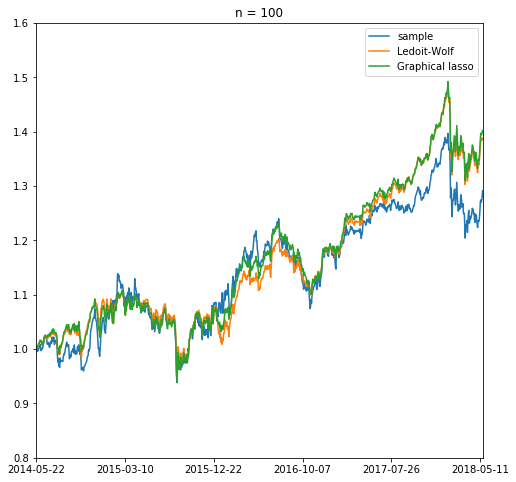

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8,8))
res['sample100'].Port_Wealth().iloc[:,0].plot(label  = 'sample')
res['lw100'].Port_Wealth().iloc[:,0].plot(label = 'Ledoit-Wolf')
res['gl100'].Port_Wealth().iloc[:,0].plot(label = 'Graphical lasso')
leg = plt.legend()
plt.title("n = 100")

plt.ylim(0.8, 1.6)
plt.savefig('n100.pdf', format='pdf')

#plt.show()



### 2. Annualized realized return

The anualized realized return of the portolio is shown in percentage.

In [20]:
#Realized Return
df_return = pd.DataFrame(np.zeros((len(L),len(method))),index = L, columns = method,dtype = 'float64')
for mtd in method:
    for j in L:
        name = mtd+str(j)
        df_return.loc[j,mtd] = 252 * np.mean(res[name].Realized_Return()[0])
round(df_return*100,2)

,sample,lw,gl
250,5.93,6.71,7.07
200,8.47,7.73,7.76
150,5.32,7.33,7.60
100,7.22,8.90,9.30


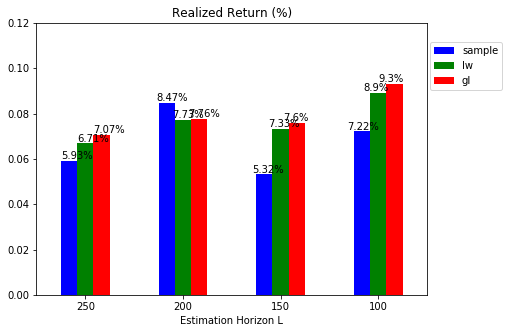

In [21]:
import matplotlib.pyplot as plt
from matplotlib import pylab
ax = df_return.plot(kind='bar', title='Realized Return (%)', 
        figsize=(7,5), rot = 0, color = ['b', 'g', 'r'], fontsize = 10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height()*100,2))+'%', (p.get_x() * 0.975, p.get_height() * 1.01))  
ax.set_xlabel("Estimation Horizon L", fontsize = 10)
pylab.legend(loc=9, bbox_to_anchor=(1.1, 0.95))
ax.set_ylim(ymin = 0.0,ymax = 0.120)

plt.savefig('realized_return.pdf', format='pdf')

### 3. Annualized realized risk

The annualized realized risk is shown in percentage.

In [22]:
#Realized risk
df_risk = pd.DataFrame(np.zeros((len(L),len(method))),index = L, columns = method,dtype = 'float64')
for mtd in method:
    for j in L:
        name = mtd+str(j)
        df_risk.loc[j,mtd] = np.sqrt(252) * np.std(res[name].Realized_Return()[0])
round(df_risk*100,2)

,sample,lw,gl
250,11.98,11.20,11.35
200,11.73,10.97,11.08
150,12.03,11.14,11.40
100,12.76,11.04,11.19


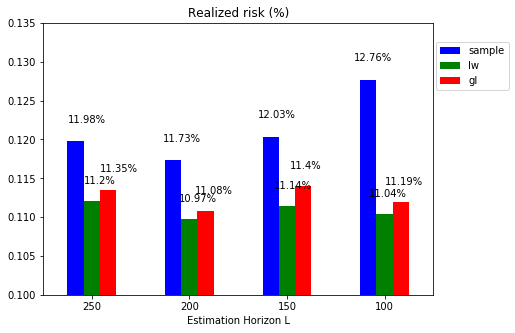

In [23]:
ax = df_risk.plot(kind='bar', title='Realized risk (%)', 
        figsize=(7,5), rot = 0, color = ['b', 'g', 'r'], fontsize = 10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height()*100,2))+'%', (p.get_x() * 0.975, p.get_height() * 1.02))  
ax.set_xlabel("Estimation Horizon L", fontsize = 10)
pylab.legend(loc=9, bbox_to_anchor=(1.1, 0.95))
ax.set_ylim(ymin = 0.1,ymax = 0.135)

plt.savefig('realized_risk.pdf', format='pdf')

### 4. Realized Sharpe ratio
 We assume that the annualized risk-free interest rate is $2%$.

In [24]:
df_sp = (df_return - 0.01) / df_risk
round(df_sp,3)

,sample,lw,gl
250,0.411,0.509,0.535
200,0.637,0.613,0.610
150,0.359,0.568,0.579
100,0.487,0.715,0.742


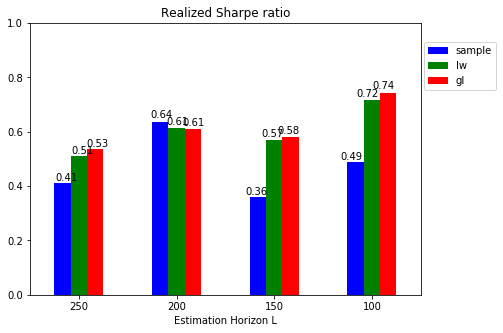

In [25]:
ax = df_sp.plot(kind='bar', title='Realized Sharpe ratio', 
        figsize=(7,5), rot = 0, color = ['b', 'g', 'r'], fontsize = 10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 0.975, p.get_height() * 1.02))  
ax.set_xlabel("Estimation Horizon L", fontsize = 10)
pylab.legend(loc=9, bbox_to_anchor=(1.1, 0.95))
ax.set_ylim(ymin = 0.0,ymax = 1)

plt.savefig('realized_sharpe_ratio.pdf', format='pdf')

### 5. Turnover

In [26]:
# Turnover
df_to = pd.DataFrame(np.zeros((len(L),len(method))),index = L, columns = method,dtype = 'float64')
for mtd in method:
    for j in L:
        name = mtd+str(j)
        df_to.loc[j,mtd] = np.mean(res[name].turnover())
round(df_to,3)

,sample,lw,gl
250,2.372,0.985,1.393
200,2.344,0.941,1.436
150,2.503,0.868,1.433
100,3.137,0.872,1.393


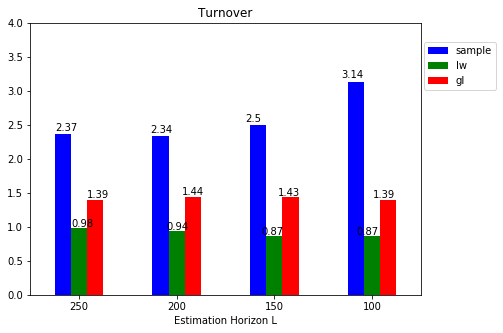

In [27]:
ax = df_to.plot(kind='bar', title='Turnover', 
        figsize=(7,5), rot = 0, color = ['b', 'g', 'r'], fontsize = 10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 0.975, p.get_height() * 1.02))  
ax.set_xlabel("Estimation Horizon L", fontsize = 10)
pylab.legend(loc=9, bbox_to_anchor=(1.1, 0.95))
ax.set_ylim(ymin = 0.0,ymax = 4)


plt.savefig('Turnover.pdf', format='pdf')

### 6. Size of short side

Size of short side is shown in percentage.

In [28]:
# Short size
df_ss = pd.DataFrame(np.zeros((len(L),len(method))),index = L, columns = method,dtype = 'float64')
for mtd in method:
    for j in L:
        name = mtd+str(j)
        df_ss.loc[j,mtd] = np.mean(res[name].shortsize()[0])
round(df_ss*100,2)

,sample,lw,gl
250,23.88,4.54,12.60
200,24.63,5.88,14.51
150,24.56,3.55,13.02
100,29.59,4.98,13.31


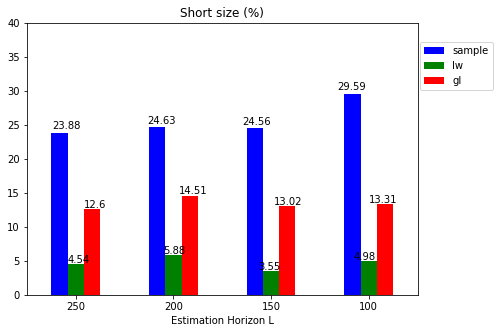

In [29]:
ax = (df_ss*100).plot(kind='bar', title='Short size (%)', 
        figsize=(7,5), rot = 0, color = ['b', 'g', 'r'], fontsize = 10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 0.975, p.get_height() * 1.02))  
ax.set_xlabel("Estimation Horizon L", fontsize = 10)
pylab.legend(loc=9, bbox_to_anchor=(1.1, 0.95))
ax.set_ylim(ymin = 0.0,ymax = 40)

plt.savefig('Short_size.pdf', format='pdf')

## Reference

[1] H. Markowitz, Portfolio selection. 1952, The Journal of Finance, Vol. 7, No. 1, pp.77-91.

[2] K. Khare, S. Oh, and B. Rajaratnam, A convex pseudolikelihood framework for high dimensional pratial correlation estimation with convergence guarantees. 2015, Journal of the Royal Statistical Society: Series B (Statistical Methodology), Vol. 77, No. 4, pp. 803-825.

[3] O. Ledoit and M. Wolf, Honey, I shrunk the sample covariance matrix. 2004, The Journal of Portfolio Management, Vol. 30, No. 4, pp. 110-119.

[4] J. Friedman, T. Hastie, and R. Tibshirani, Sparse inverse covariance estimation with the graphical LASSO. 2008, Biostatistics, Vol. 9, No. 8, pp. 432-441.

[5] M. Chiu, C. Pun, and H.Y. Wong, Big data challenges of high-dimensional continuous-time mean-variance portfolio selection and a remedy. 2017. Risk analysis, Vol. 37, No. 8, pp. 1532-1549.